In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
from random import sample #Used for random initialization
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy import linalg #Used for the "SVD" function
from scipy.io import loadmat
import os
import pandas as pd
from matplotlib.colors import ListedColormap
import imageio
from sklearn.metrics import mean_squared_error
import random

In [20]:
import scipy
from PIL import Image
from scipy import ndimage
from skimage.transform import resize
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [41]:
my_image = "p1.jpg"
image = np.array(plt.imread(my_image))
image_gray = rgb2gray(image)
my_image_resize = resize(image, (64,64))
my_image_resize_gray = rgb2gray(my_image_resize)


/home/abdu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/abdu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


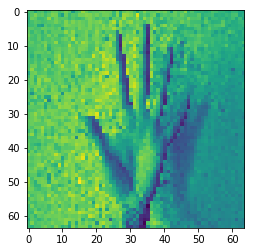

In [42]:
plt.imshow(my_image_resize_gray)

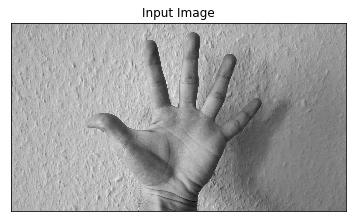

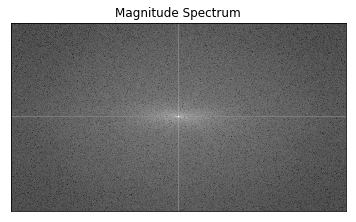

In [78]:
f = np.fft.fft2(image_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.imshow(image_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

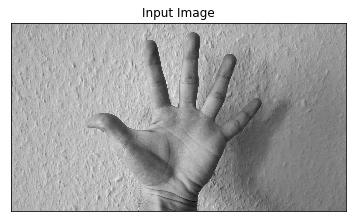

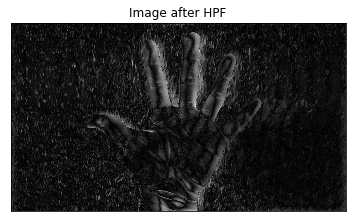

In [80]:
rows, cols = image_gray.shape
crow,ccol = rows//2 , cols//2
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(image_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()
#plt.imshow(img_back)
#plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
#plt.show()

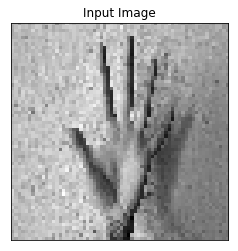

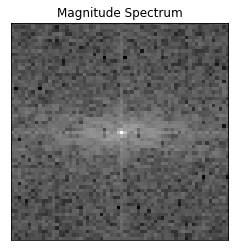

In [82]:
f = np.fft.fft2(my_image_resize_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20000*np.log(np.abs(fshift))

plt.imshow(my_image_resize_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

64 64


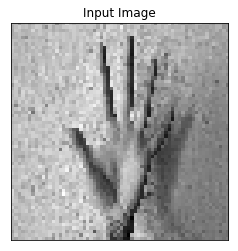

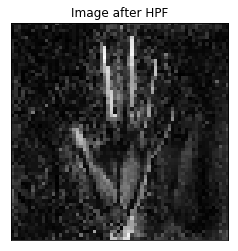

In [84]:
rows, cols = my_image_resize_gray.shape
print(rows, cols)
crow,ccol = rows//2 , cols//2
fshift[crow-3:crow+3, ccol-3:ccol+3] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(my_image_resize_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()
#plt.imshow(img_back)
#plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
#plt.show()